In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder, StandardScaler
%matplotlib inline 

In [2]:
medical_df = pd.read_csv('Machine-Learning-with-R-datasets-master/medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [6]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [7]:
fig = px.histogram(
    medical_df,
    marginal='box',
    x='age',
    nbins=47,
    title='Distribution of Age'
)
fig.update_layout(bargap=0.1)
fig.show()

In [8]:
fig = px.histogram(
    medical_df,
    x='bmi',
    marginal='box',
    color_discrete_sequence=['red'],
    title='Distribution of BMI'
)
fig.update_layout(bargap=0.1)
fig.show()

In [9]:
fig = px.histogram(
    medical_df,
    x='charges',
    marginal='box',
    color='smoker',
    color_discrete_sequence=['green','grey'],
    title='Distribution of Charges'
)
fig.update_layout(bargap=0.1)
fig.show()

In [10]:
fig = px.bar(
    medical_df,
    x='sex',
    y='charges',
    color='smoker',
    barmode='group',
)
fig.show()


In [11]:
fig = px.histogram(
    medical_df,
    x='charges',
    marginal='box',
    color='sex',
    color_discrete_sequence=['red','blue'],
    title='Distribution of Charges'
)
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
fig = px.histogram(
    medical_df,
    x='charges',
    marginal='box',
    color='region',
    color_discrete_sequence=['green','grey'],
    title='Distribution of Charges'
)
fig.update_layout(bargap=0.1)
fig.show()

In [13]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [14]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

In [15]:
fig = px.scatter(
    medical_df,
    x='age',
    y='charges',
    color='smoker',
    opacity=0.8,
    hover_data=['sex'],
    title="Age vs. Charges"
)
fig.update_traces(marker_size=5)
fig.show()

In [16]:
fig = px.scatter(
    medical_df,
    x='bmi',
    y='charges',
    color='smoker',
    opacity=0.8,
    hover_data=['sex'],
    title="BMI vs. Charges"
)
fig.update_traces(marker_size=5)
fig.show()

In [17]:
fig = px.violin(
    medical_df,
    y='charges',
    x='children',
)
fig.show()

In [18]:
medical_df.charges.corr(medical_df.age)

0.2990081933306478

In [19]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362887

In [20]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984778

In [21]:
medical_df[['age', 'bmi', 'children', 'charges']].corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

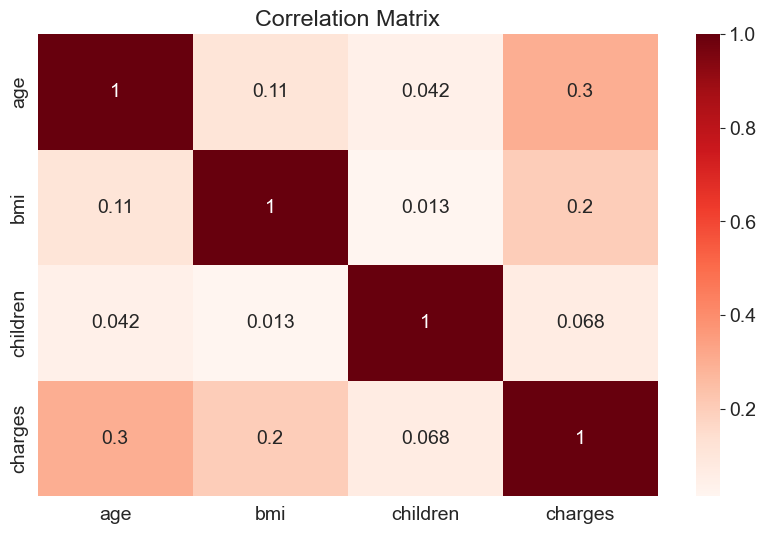

In [22]:
sns.heatmap(medical_df[['age', 'bmi', 'children', 'charges']].corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

## Linear Regression using Single Feature

In [23]:
non_smoker_df = medical_df[medical_df.smoker == 'no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


<Axes: title={'center': 'Age vs charges for non-smokers'}, xlabel='age', ylabel='charges'>

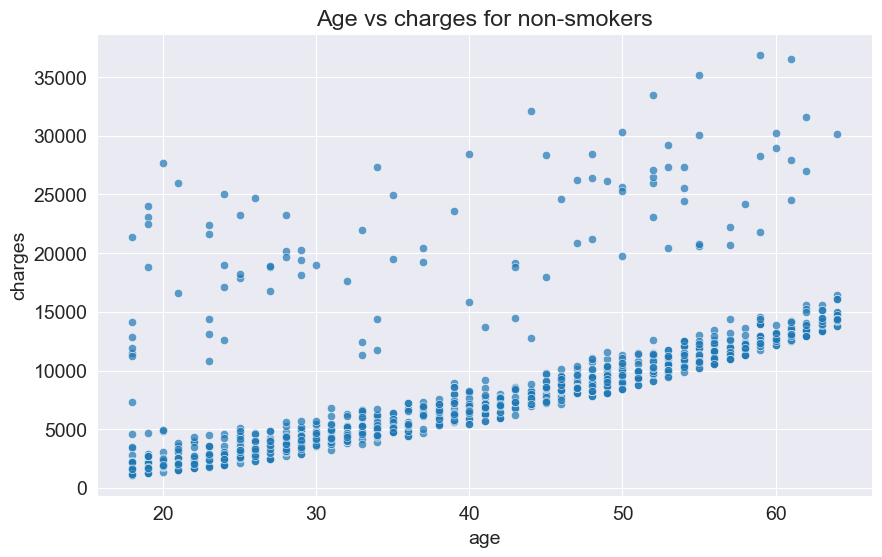

In [24]:
plt.title('Age vs charges for non-smokers')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7)


In [25]:
def estimate_charges(age ,w, b):
    return w * age + b


In [26]:
w = 50
b = 100
ages = non_smoker_df.age.values

In [27]:
estimated_charges = estimate_charges(ages, w , b)
estimated_charges

array([1000, 1500, 1750, ..., 1000, 1000, 1150], dtype=int64)

Text(0, 0.5, 'Charges')

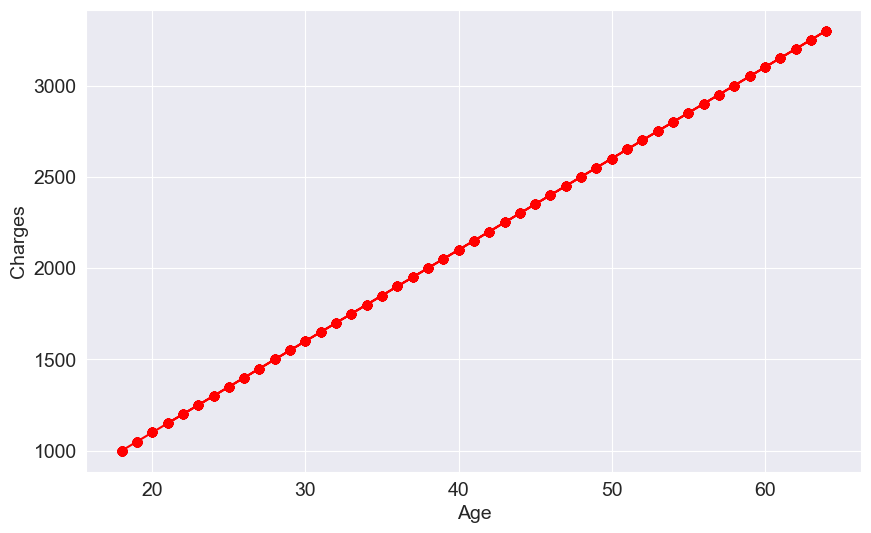

In [28]:
plt.plot(ages, estimated_charges, 'r-o')
plt.xlabel('Age')
plt.ylabel('Charges')


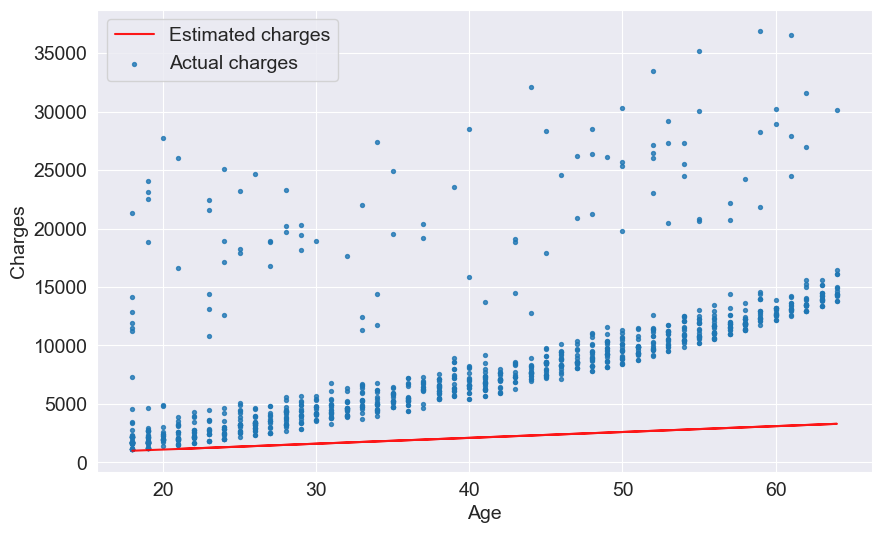

In [29]:
target = non_smoker_df.charges.values

plt.plot(ages, estimated_charges, 'r', alpha=0.9)

plt.scatter(ages, target, s=8, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimated charges', 'Actual charges'])

In [30]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

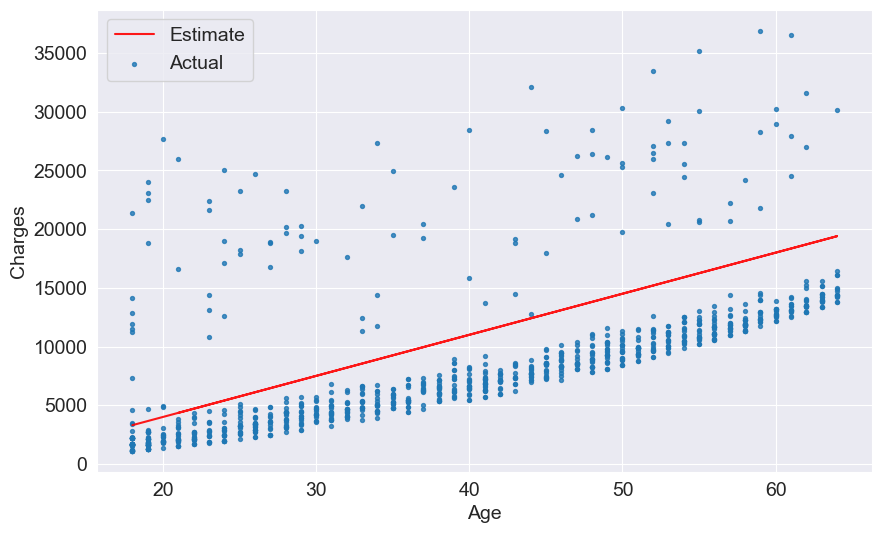

In [31]:
try_parameters(350, -3000)

In [32]:
predictions = estimated_charges
predictions

array([1000, 1500, 1750, ..., 1000, 1000, 1150], dtype=int64)

In [33]:
def rmse(target, predictions):
    return  np.sqrt(np.mean((np.square(target-predictions))))

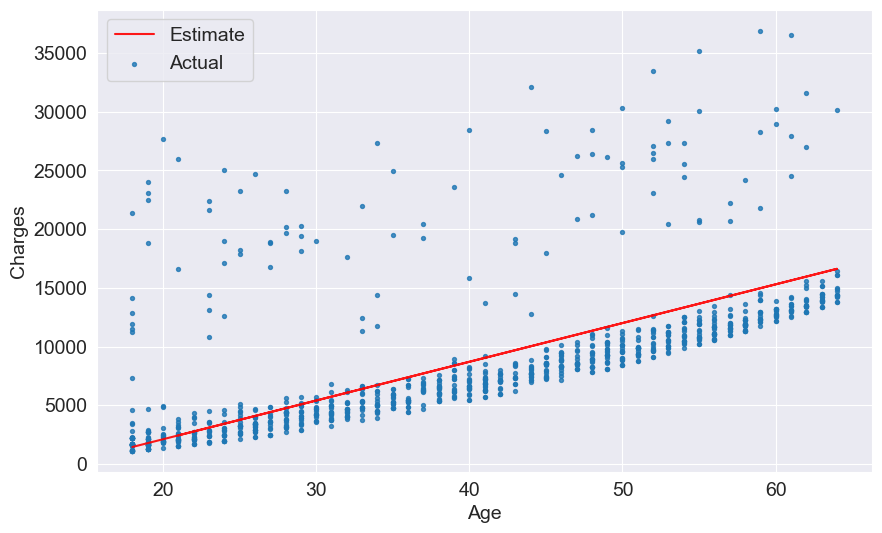

In [34]:
w = 330
b = -4500

try_parameters(w, b)

In [35]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [36]:
rmse(targets, predicted)

4745.860761807111

In [37]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

    loss = rmse(target, estimated_charges)
    print('RMSE:', loss)

RMSE: 4670.521202520753


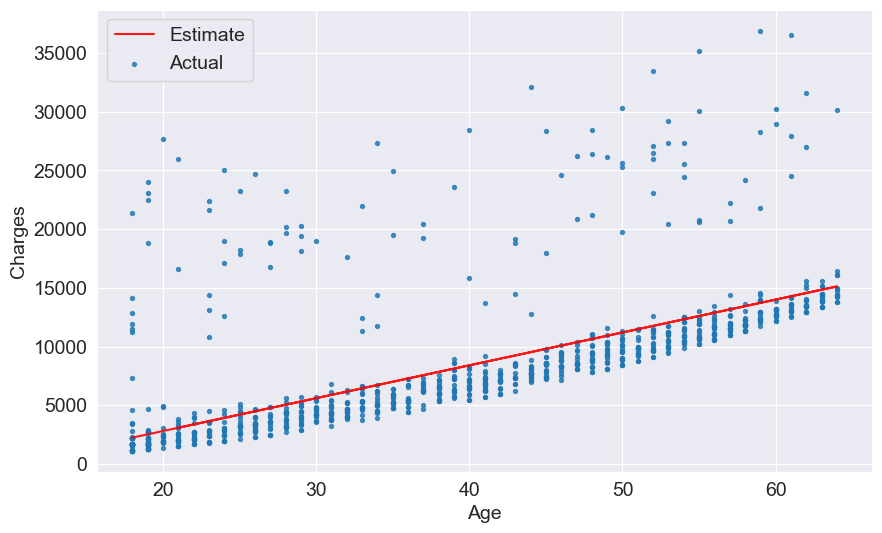

In [38]:
try_parameters(280, -2800)

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [40]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [41]:
inputs = non_smoker_df[['age']]
target = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('target.shape :', target.shape)

inputs.shape : (1064, 1)
target.shape : (1064,)


In [42]:
model.fit(inputs, target)

LinearRegression()

In [43]:
model.predict([
            [18],
            [25], 
            [69]])

c:\Users\mehul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 2719.0598744 ,  4589.80226421, 16348.75442879])

In [44]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [45]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [46]:
rmse(target, predictions)

4662.505766636395

In [47]:
w = model.coef_
b = model.intercept_

RMSE: 4662.505766636395


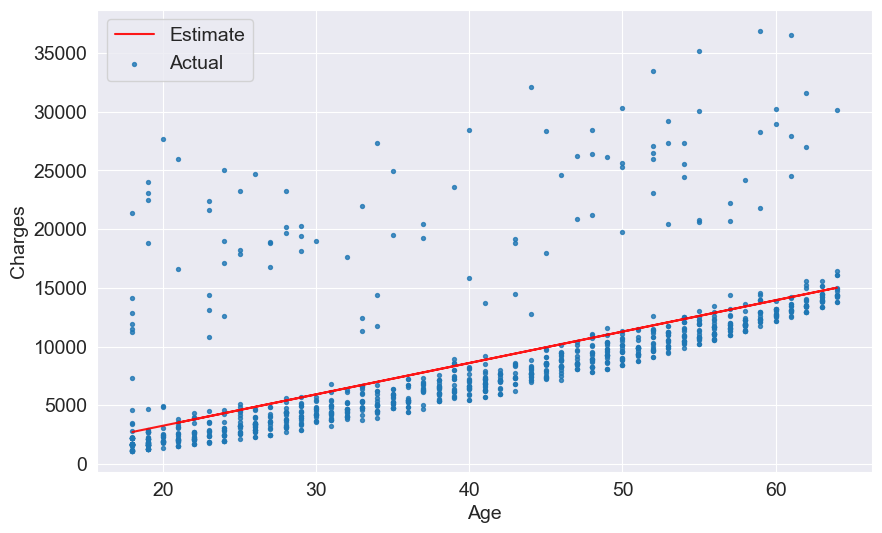

In [48]:
try_parameters(w, b)

In [49]:
from sklearn.linear_model import SGDRegressor
SGreg = SGDRegressor(
    loss='huber',
    learning_rate='optimal',
    max_iter=5000,
    tol=1e-6,
    penalty='l1',
)

In [50]:
SGreg.fit(inputs, target)

SGDRegressor(learning_rate='optimal', loss='huber', max_iter=5000, penalty='l1',
             tol=1e-06)

In [51]:
predictions = SGreg.predict(inputs)
predictions

array([2995.22172024, 4998.83560745, 6000.64255105, ..., 2995.22172024,
       2995.22172024, 3596.3058864 ])

RMSE: 4894.669810914987


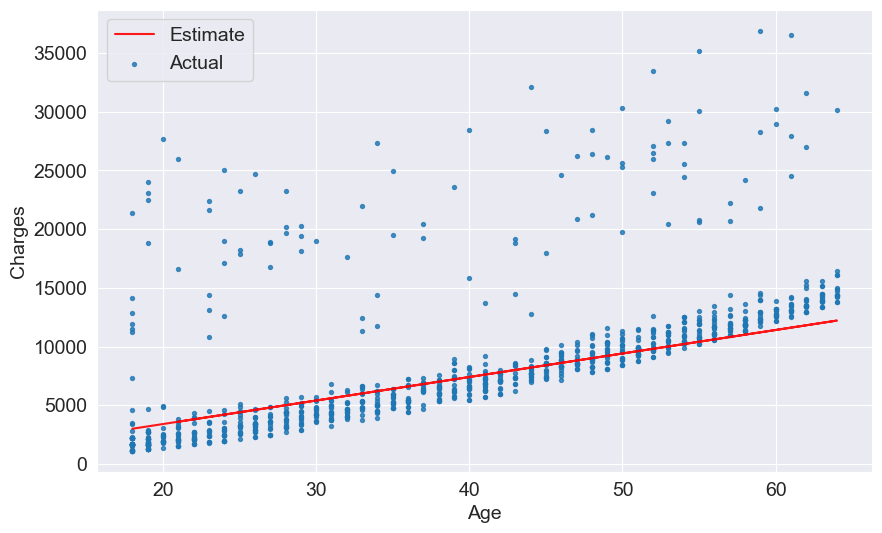

In [52]:
w = SGreg.coef_
b = SGreg.intercept_

try_parameters(w, b)


In [53]:
inputs, target = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df.charges

model = LinearRegression().fit(inputs, target)

predictions = model.predict(inputs) 

loss = rmse(target, predictions)

print('RMSE:', loss)

RMSE: 4608.470405038246


In [54]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.08403654312833271

In [55]:
inputs = non_smoker_df[['bmi']]
target = non_smoker_df.charges

model = LinearRegression().fit(inputs, target)

predictions = model.predict(inputs)

loss = rmse(target, predictions)
print('RMSE:', loss)

RMSE: 5969.772531913293


RMSE: 5969.772531913293


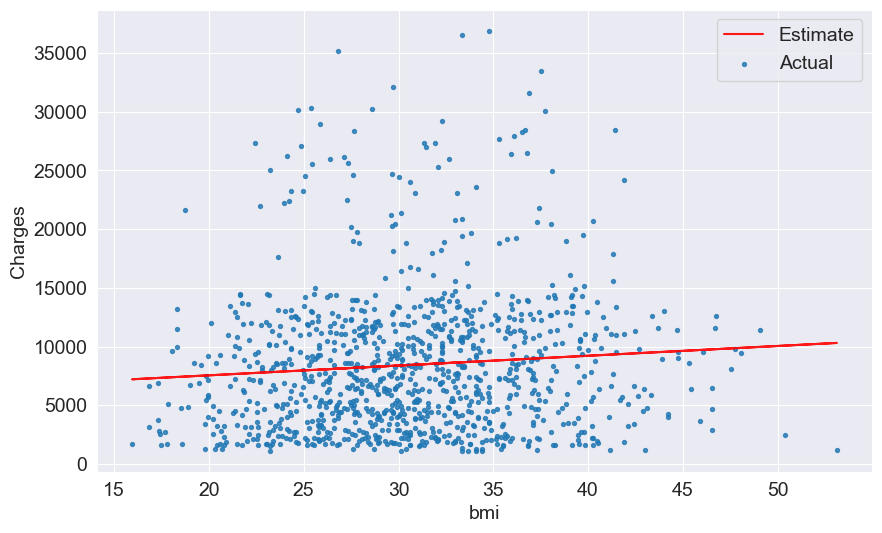

In [56]:
w = model.coef_
b = model.intercept_

def try_parameters_custom(w, b, input):
    ages = non_smoker_df[f'{input}']
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel(f"{input}");
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

    loss = rmse(target, estimated_charges)
    print('RMSE:', loss)

try_parameters_custom(w, b, 'bmi')

In [57]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542205

In [58]:
fig = px.strip(
    non_smoker_df,
    x='children',
    y='charges',
    title='Children vs. Charges'
)

fig.update_traces(marker_size=4, marker_opacity=0.8)
fig.show()


In [59]:
inputs , target = non_smoker_df[['age','bmi', 'children']], non_smoker_df.charges

In [60]:
lr = LinearRegression().fit(inputs, target)

predictions = lr.predict(inputs)

loss = rmse(target, predictions)

print('RMSE:', loss)

RMSE: 4608.470405038246


In [61]:
smoker_df = medical_df[medical_df.smoker == 'yes']

inputs , target = smoker_df[['age','bmi', 'children']], smoker_df.charges

lr = LinearRegression().fit(inputs, target)

predictions = lr.predict(inputs)

loss = rmse(target, predictions)

print('RMSE:', loss)

RMSE: 5718.202480524154


In [62]:
smoker_df.charges.corr(smoker_df.bmi)

0.8064806070155403

In [63]:
inputs, targets = medical_df[['age','bmi', 'children']] , medical_df.charges

lr = LinearRegression().fit(inputs, targets)

predictions = lr.predict(inputs)

loss = rmse(targets, predictions)

print('RMSE:', loss)

RMSE: 11355.317901125973


In [64]:
SGreg = SGDRegressor(
    loss='huber',
    learning_rate='optimal',
    max_iter=5000,
    tol=1e-6,
    penalty='l1',
)

SGreg.fit(inputs, targets)

predictions = SGreg.predict(inputs)

loss = rmse(targets, predictions)

print('RMSE:', loss)


RMSE: 12822.506231419877


<Axes: xlabel='smoker', ylabel='charges'>

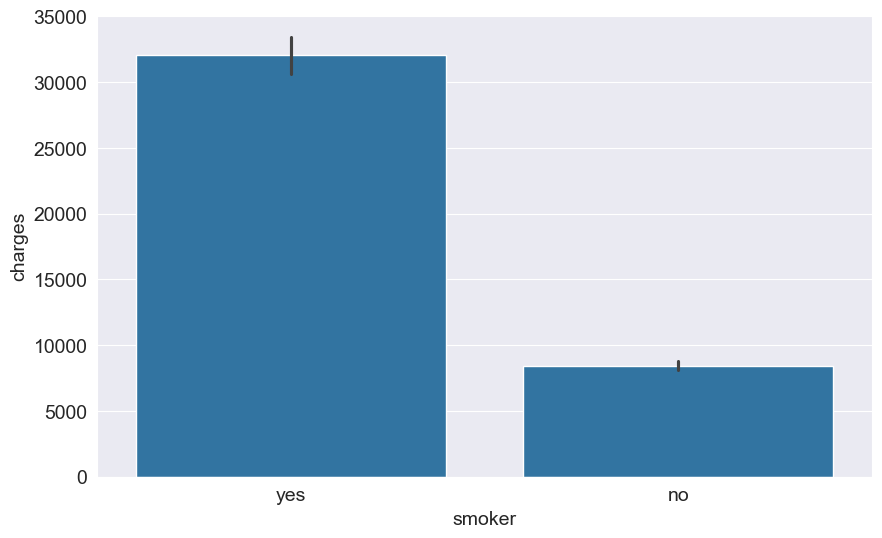

In [65]:
sns.barplot(data=medical_df, x='smoker', y='charges')

In [66]:
smoker = {'no': 0, 'yes': 1}

medical_df['smoker'] = medical_df.smoker.map(smoker)

medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [67]:
medical_df.charges.corr(medical_df.smoker)

0.7872514304984778

In [68]:
inputs, target = medical_df[['age', 'bmi', 'children', 'smoker']], medical_df.charges

lr = LinearRegression().fit(inputs, target)

predictions = lr.predict(inputs)

loss = rmse(target, predictions)

print('RMSE:', loss)

RMSE: 6056.439217188081


In [69]:
sex = {'female' : 0, 'male' : 1}
medical_df['sex'] = medical_df.sex.map(sex)

In [70]:
medical_df.charges.corr(medical_df.sex)

0.05729206220202533

In [71]:
inputs, target =medical_df[['age', 'bmi', 'children', 'smoker', 'sex']], medical_df.charges

lr = LinearRegression().fit(inputs, target)

predictions = lr.predict(inputs)

loss = rmse(target, predictions)

print('RMSE:', loss)
                             

RMSE: 6056.100708754546


<Axes: xlabel='region', ylabel='charges'>

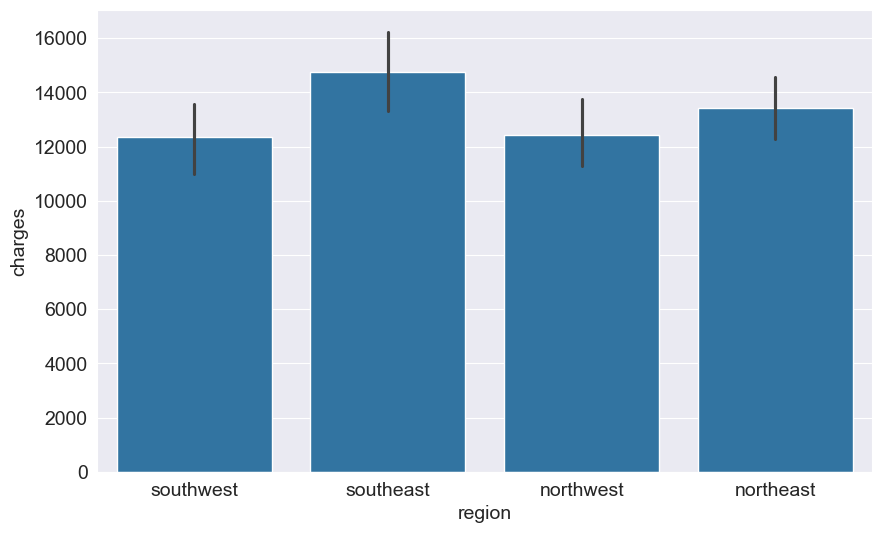

In [72]:
sns.barplot(medical_df, x='region', y='charges')

In [73]:
encoder = OneHotEncoder()
encoder.fit(medical_df[['region']])

encoder.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [74]:
one_hot = encoder.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [75]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [76]:
medical_df

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,northeast,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,southeast,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,southwest,2007.94500,0.0,0.0,0.0,1.0


In [77]:
input_cols = ['age', 'bmi', 'children', 'smoker','northwest', 'southeast', 'southwest', 'northeast', 'sex']
target_col = 'charges'


inputs, target = medical_df[input_cols], medical_df[target_col]

lr = LinearRegression().fit(inputs, target)

predictions = lr.predict(inputs)

loss = rmse(target, predictions)

print('RMSE:', loss)

RMSE: 6041.6796511744515


In [78]:
# create two different models for smoker and non-smoker

smoker_df = medical_df[medical_df.smoker == 1]
non_smoker_df = medical_df[medical_df.smoker == 0]

input_cols = ['age', 'bmi', 'children','northwest', 'southeast', 'southwest', 'northeast', 'sex']
target_col = 'charges'


inputs, target = smoker_df[input_cols], smoker_df[target_col]

lr = LinearRegression().fit(inputs, target)

predictions = lr.predict(inputs)

loss = rmse(target, predictions)

print('RMSE:', loss)

RMSE: 5668.4678821121515


In [79]:
inputs, target = non_smoker_df[input_cols], non_smoker_df[target_col]

lr = LinearRegression().fit(inputs, target)

predictions = lr.predict(inputs)

loss = rmse(target, predictions)

print('RMSE:', loss)

RMSE: 4573.074988795492


In [80]:
lr.coef_

array([ 264.48143811,   18.98046182,  587.45825749,  185.554256  ,
       -258.36537156, -660.87190331,  733.68301887, -525.97048681])

In [81]:
lr.intercept_

-2940.747154556302

In [82]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])



StandardScaler()

In [83]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [84]:
cat_cols = ['smoker', 'sex', 'northwest', 'southeast', 'southwest', 'northeast']

categorical_data = medical_df[cat_cols].values

In [85]:
inputs = np.concatenate([scaled_inputs, categorical_data], axis=1)

target = medical_df.charges

lr = LinearRegression().fit(inputs, target)

predictions = lr.predict(inputs)

loss = rmse(target, predictions)

print('RMSE:', loss)

RMSE: 6041.679651174452


In [86]:
lr.coef_

array([ 3607.47273619,  2067.69196584,   572.99820995, 23848.53454191,
        -131.3143594 ,   234.0453356 ,  -448.01281436,  -373.04175627,
         587.00923503])

In [87]:
lr.intercept_

8466.483215411827

In [88]:
new_customer = [[28,32,2,1,0,0,1,0,0.]]

scaled_inputs = scaler.transform([new_customer[0][:3]])

scaled_inputs


c:\Users\mehul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355,  0.21926237,  0.75107928]])

In [89]:
new_customer = [[-0.79795355,  0.21926237,  0.75107928,1,0,0,1,0,0.]]

lr.predict([new_customer[0]])

array([29872.14339042])

In [94]:
from sklearn.model_selection import train_test_split

inputs_train, inputs_test, target_train, target_test = train_test_split(inputs, target, test_size=0.1, random_state=42)

model = LinearRegression().fit(inputs_train, target_train)

predictions = model.predict(inputs_test)

loss = rmse(target_test, predictions)

print('test RMSE:', loss)

test RMSE: 5681.183886386303


In [95]:
predictions_train = model.predict(inputs_train)

loss = rmse(target_train, predictions_train)

print('RMSE:', loss)

RMSE: 6082.272151066889
